In [28]:
import cv2
def skeletonize_1(image, structuring_element):
    n = 0
    y1 = image
    skel = np.zeros(image.shape, dtype=np.uint8)
    Sn_x = []

    while np.max(y1) != 0:
        y2 = cv2.erode(y1, structuring_element)
        y3 = cv2.dilate(y2, structuring_element)
        Sn_x.append(y1 - y3)
        skel += (y1 - y3)
        y1 = y2
        n += 1
    
    Sn_x.append(y1)
    N = n
    return skel, n, Sn_x

def reconstruct(skel, structuring_element, N, Sn_x):  
    n = N
    A = np.zeros_like(skel)

    while True:
        A = np.bitwise_or(A, Sn_x[n])
        if n <= 1:
            break
        A = cv2.dilate(A, structuring_element)
        n -= 1
    return A


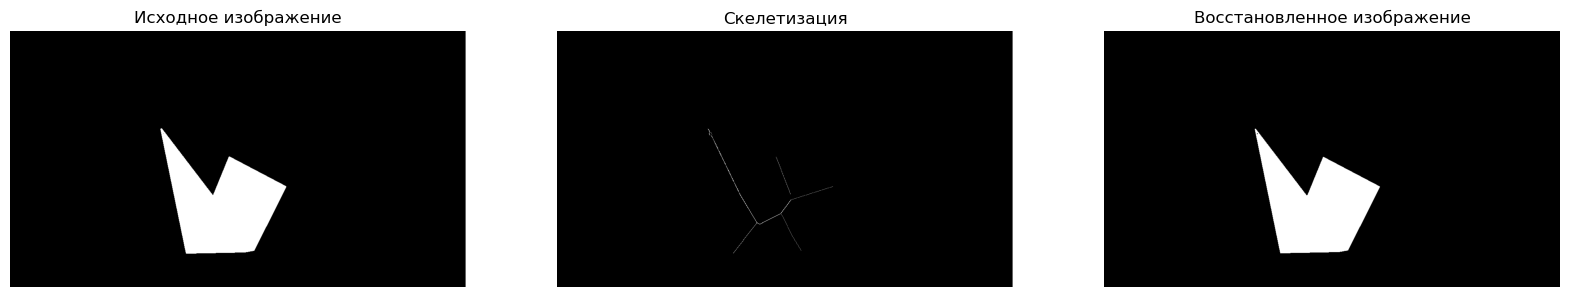

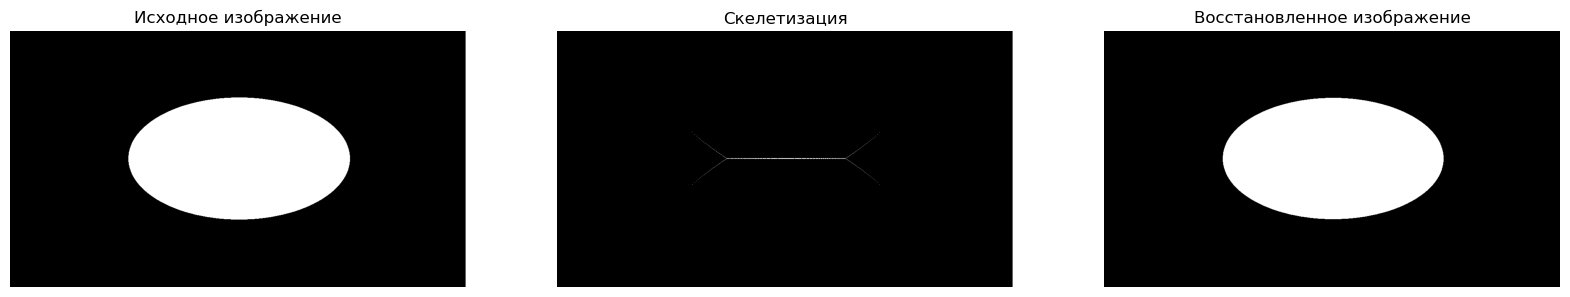

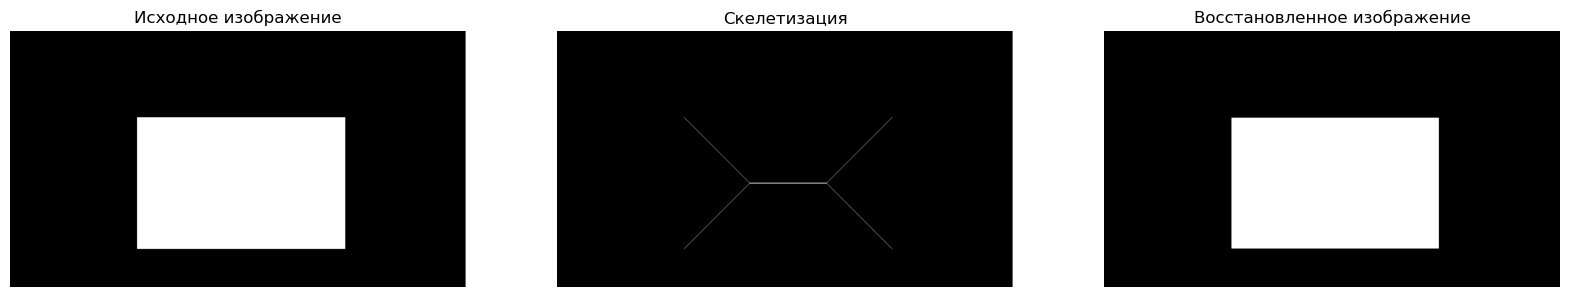

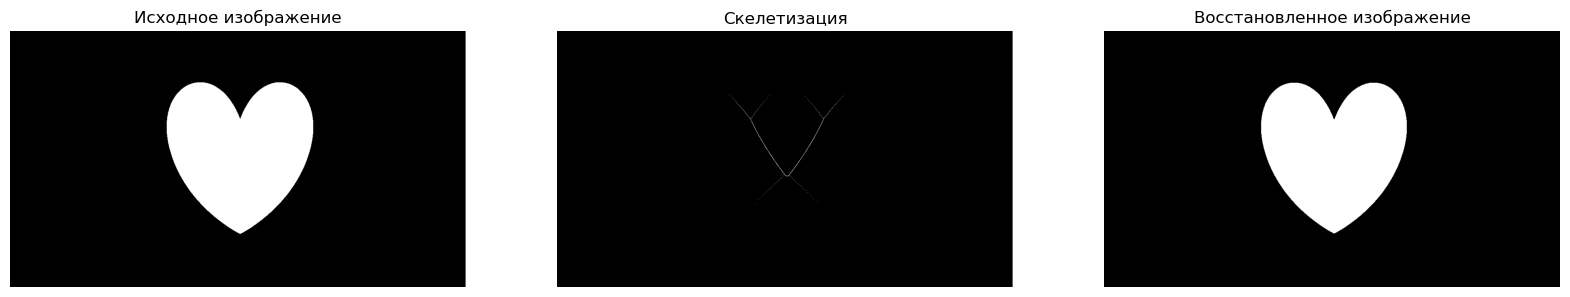

In [32]:
import matplotlib.pyplot as plt
import numpy as np

image_1 = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)
image_2 = cv2.imread('oval.png', cv2.IMREAD_GRAYSCALE)
image_3 = cv2.imread('rectangle.png', cv2.IMREAD_GRAYSCALE)
image_4 = cv2.imread('heart.png', cv2.IMREAD_GRAYSCALE)

images = [image_1, image_2, image_3, image_4]
structuring_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

for image in images:
    skeleton, n, Sn_x = skeletonize_1(image, structuring_element)
    reconstructed = reconstruct(skeleton, structuring_element, n, Sn_x)

    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Исходное изображение')
    axes[0].axis('off')

    axes[1].imshow(skeleton, cmap='gray')
    axes[1].set_title('Скелетизация')
    axes[1].axis('off')

    axes[2].imshow(reconstructed, cmap='gray')
    axes[2].set_title('Восстановленное изображение')
    axes[2].axis('off')